# Kaggle项目—— House Pricing

## 1. EDA

In [135]:
#导入本项目所需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [136]:
#导入本项目数据集
df_train = pd.read_csv('data/train.csv',index_col = 0)
df_test = pd.read_csv('data/test.csv',index_col = 0)

#### 探索train数据集

In [137]:
df_train.shape

(1460, 80)

In [138]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

变量解释如下：

SalePrice - 房产销售价格，以美元计价。所要预测的目标变量。

MSSubClass: The building class 建筑等级

MSZoning: The general zoning classification 区域分类

LotFrontage: Linear feet of street connected to property 房子同街道之间的距离

LotArea: Lot size in square feet 建筑面积

Street: Type of road access 主路的路面类型

Alley: Type of alley access 小道的路面类型

LotShape: General shape of property 房屋外形

LandContour: Flatness of the property 平整度

Utilities: Type of utilities available 配套公用设施类型

LotConfig: Lot configuration 配置

LandSlope: Slope of property 土地坡度

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad 与主要公路及铁路的距离

Condition2: Proximity to main road or railroad (if a second is present) 与主要公路及铁路的距离

BldgType: Type of dwelling 住宅类型

HouseStyle: Style of dwelling 房屋的层数

OverallQual: Overall material and finish quality 完工质量和材料

OverallCond: Overall condition rating 整体条件等级

YearBuilt: Original construction date 建造年份

YearRemodAdd: Remodel date 翻修年份

RoofStyle: Type of roof 屋顶类型

RoofMatl: Roof material 屋顶材料

Exterior1st: Exterior covering on house 外立面材料

Exterior2nd: Exterior covering on house (if more than one material) 外立面材料2

MasVnrType: Masonry veneer type 装饰石材类型

MasVnrArea: Masonry veneer area in square feet 装饰石材面积

ExterQual: Exterior material quality 外立面材料质量

ExterCond: Present condition of the material on the exterior 外立面材料外观情况

Foundation: Type of foundation 基础类型

BsmtQual: Height of the basement 地下室高度

BsmtCond: General condition of the basement 地下室总体情况

BsmtExposure: Walkout or garden level basement walls 地下室出口或者花园层的墙面

BsmtFinType1: Quality of basement finished area 地下室区域质量

BsmtFinSF1: Type 1 finished square feet Type 1完工面积

BsmtFinType2: Quality of second finished area (if present) 二次完工面积质量（如果有）

BsmtFinSF2: Type 2 finished square feet Type 2完工面积

BsmtUnfSF: Unfinished square feet of basement area 地下室区域未完工面积

TotalBsmtSF: Total square feet of basement area 地下室总体面积

Heating: Type of heating 采暖类型

HeatingQC: Heating quality and condition 采暖质量和条件

CentralAir: Central air conditioning 中央空调系统

Electrical: Electrical system 电力系统

1stFlrSF: First Floor square feet 第一层面积

2ndFlrSF: Second floor square feet 第二层面积

LowQualFinSF: Low quality finished square feet (all floors) 低质量完工面积

GrLivArea: Above grade (ground) living area square feet 地面以上部分起居面积

BsmtFullBath: Basement full bathrooms 地下室全浴室

BsmtHalfBath: Basement half bathrooms 地下室半浴室

FullBath: Full bathrooms above grade 地面以上全浴室

HalfBath: Half baths above grade 地面以上半浴室

Bedroom: Number of bedrooms above basement level 地面以上卧室

Kitchen: Number of kitchens 厨房数量

KitchenQual: Kitchen quality 厨房质量

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) 总房间数（不含浴室和地下部分）

Functional: Home functionality rating 功能性评级

Fireplaces: Number of fireplaces 壁炉数量

FireplaceQu: Fireplace quality 壁炉质量

GarageType: Garage location 车库位置

GarageYrBlt: Year garage was built 车库建造时间

GarageFinish: Interior finish of the garage 车库中间建成时间（比如翻修）

GarageCars: Size of garage in car capacity 车库大小以停车数量表示

GarageArea: Size of garage in square feet 车库面积

GarageQual: Garage quality 车库质量

GarageCond: Garage condition 车库条件

PavedDrive: Paved driveway 硬化路面

WoodDeckSF: Wood deck area in square feet 实木地板面积

OpenPorchSF: Open porch area in square feet 开放式门廊面积

EnclosedPorch: Enclosed porch area in square feet 封闭式门廊面积

3SsnPorch: Three season porch area in square feet 时令门廊面积

ScreenPorch: Screen porch area in square feet 屏幕门廊面积

PoolArea: Pool area in square feet 游泳池面积

PoolQC: Pool quality 游泳池质量

Fence: Fence quality 围栏质量

MiscFeature: Miscellaneous feature not covered in other categories 其它条件中未包含部分的特性

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold 卖出月份

YrSold: Year Sold 卖出年份

SaleType: Type of sale 出售类型

SaleCondition: Condition of sale 出售条件

In [139]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [140]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [141]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

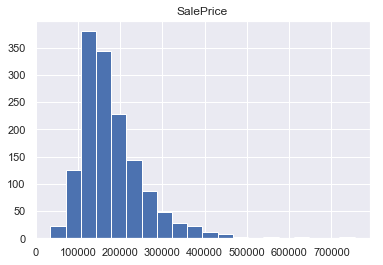

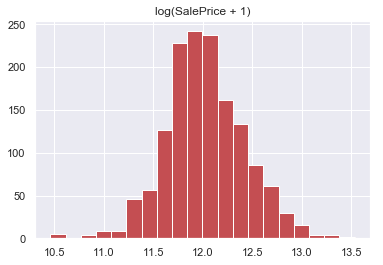

In [142]:
plt.hist(df_train['SalePrice'], bins = 20, color = 'B')
plt.title('SalePrice')
plt.show()

plt.hist(np.log1p(df_train['SalePrice']), bins = 20, color = 'R')
plt.title('log(SalePrice + 1)')
plt.show()

In [143]:
print("偏度: %f" % df_train['SalePrice'].skew())
print("峰度: %f" % df_train['SalePrice'].kurt())

偏度: 1.882876
峰度: 6.536282


In [144]:
# 探索与SalePrice相关性绝对值大于0.3的变量
corr_train = df_train.corr()
corr_train[(corr_train['SalePrice'] > 0.3)|(corr_train['SalePrice'] < -0.3)]['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64

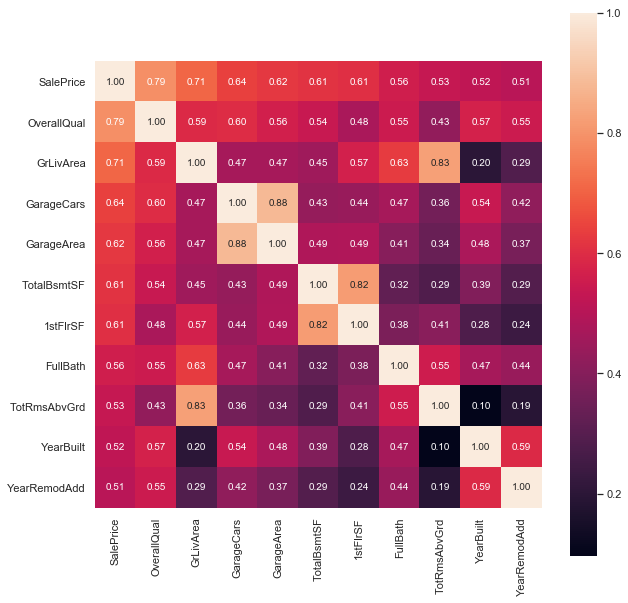

In [145]:
# 相关系数图
plt.figure(figsize=(10,10))
k = 11 #number of variables for heatmap
cols = corr_train.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

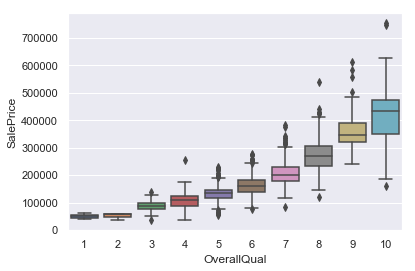

In [146]:
# OverallQual与SalePrice箱线图
sns.boxplot(x = df_train['OverallQual'], y = df_train['SalePrice'])

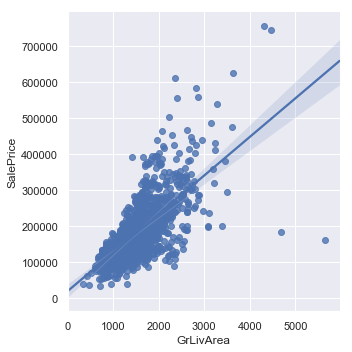

In [147]:
# GrLivArea与SalePrice散点图
sns.lmplot(x = 'GrLivArea', y = 'SalePrice', data = df_train)

In [148]:
# 删除异常点
df_train.drop(df_train[(df_train['GrLivArea']>4000)&(df_train['SalePrice']<300000)].index,inplace=True)

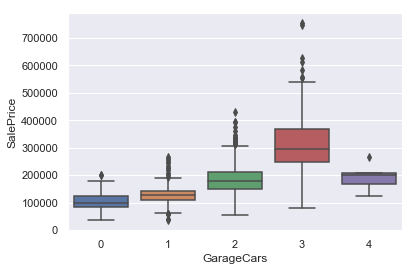

In [149]:
# GarageCars与SalePrice箱线图
sns.boxplot( x = df_train['GarageCars'], y = df_train['SalePrice'])

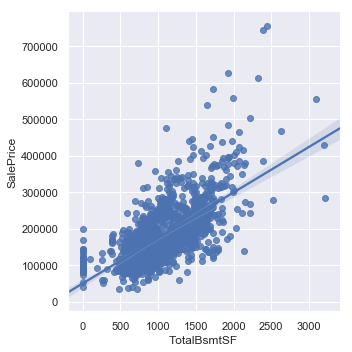

In [150]:
# TotalBsmtSF与SalePrice散点图
sns.lmplot(x = 'TotalBsmtSF', y = 'SalePrice', data = df_train)

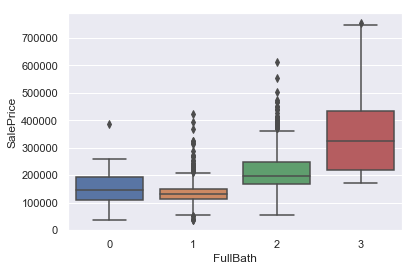

In [151]:
# FullBath与SalePrice箱线图
sns.boxplot(x = df_train['FullBath'], y = df_train['SalePrice'])

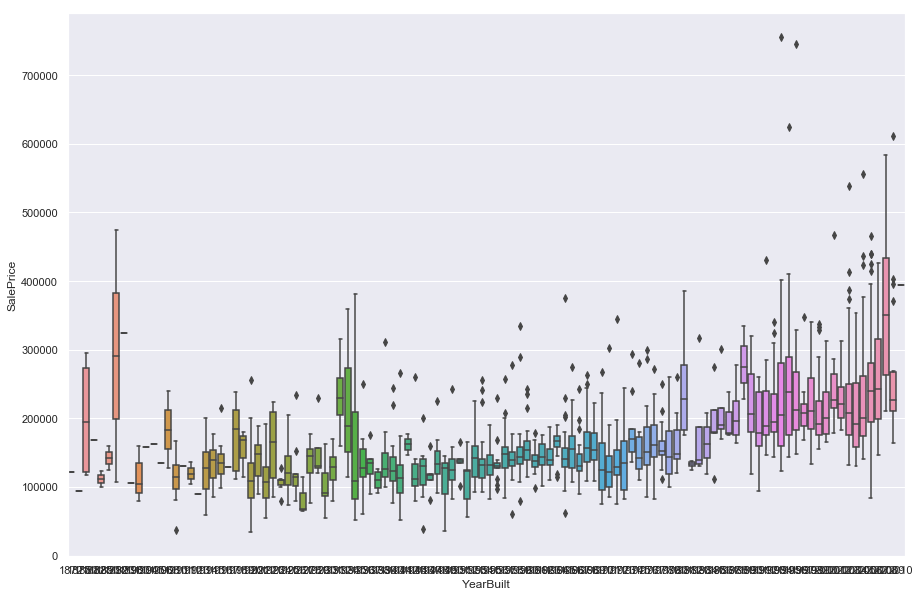

In [152]:
# YearBuilt与SalePrice箱线图
plt.figure(figsize=(15,10))
sns.boxplot(x = df_train['YearBuilt'], y = df_train['SalePrice'])

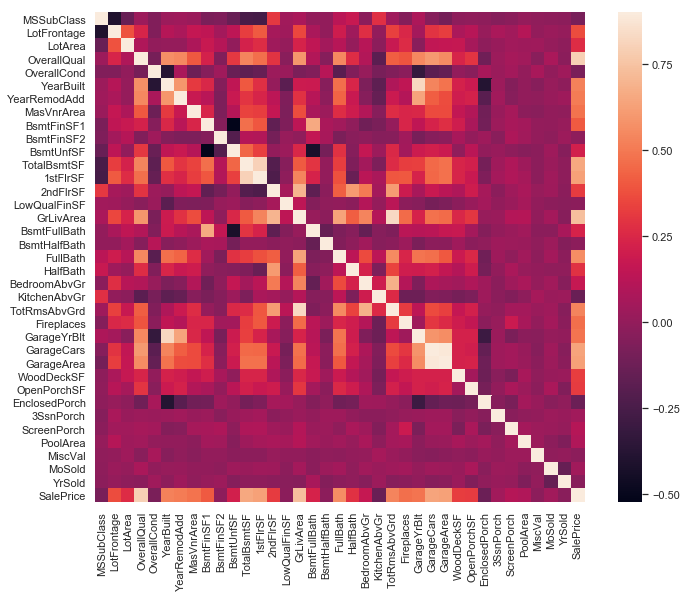

In [153]:
# 相关系数矩阵
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.9, square=True);

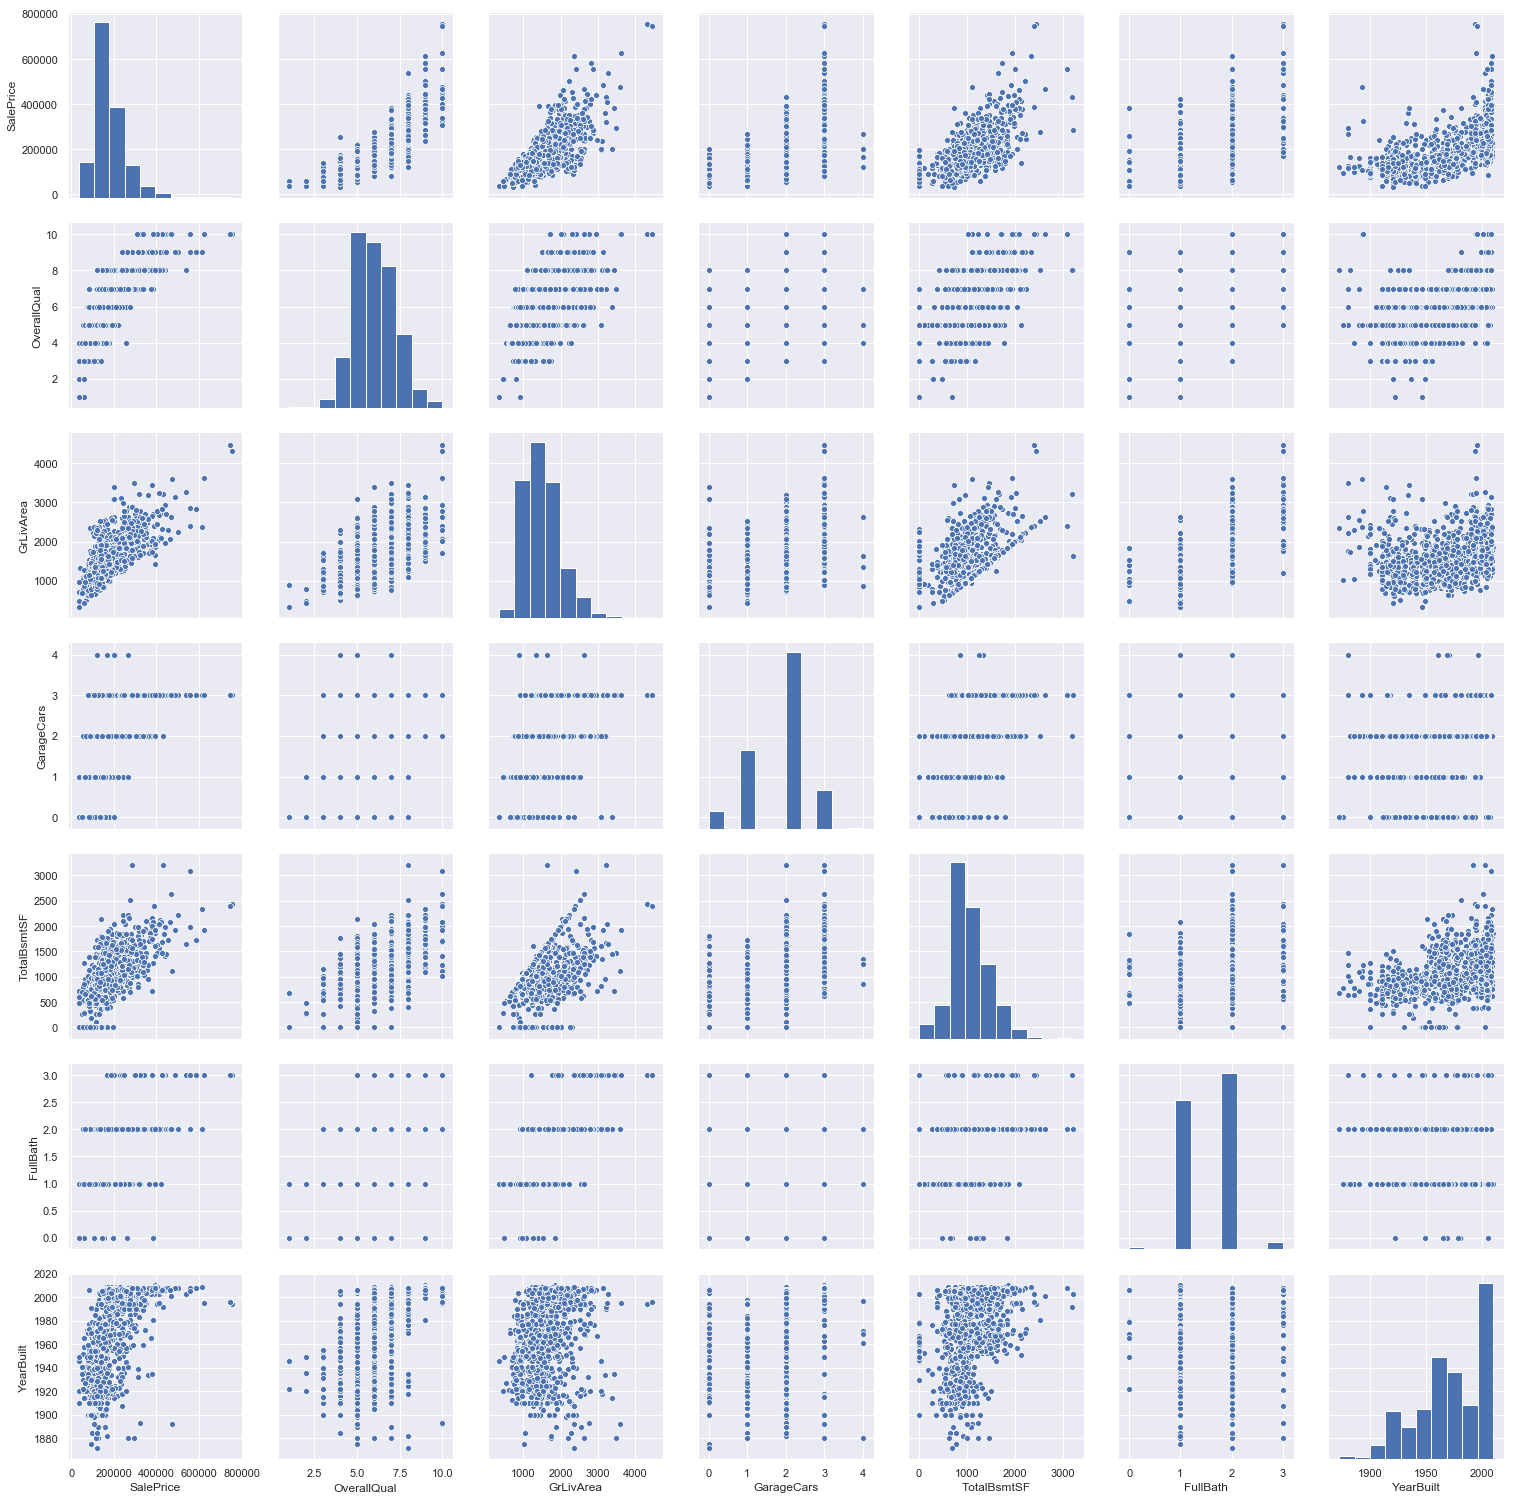

In [154]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 3)
plt.show()

#### 观察test数据集

In [155]:
df_test.shape

(1459, 79)

In [156]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 

## 2. 数据清理

In [157]:
# train数据集与test数据集仅多SalePrice这个目标变量，为后续处理数据集统一，将二者合并。后续做训练再分开。
df_all = pd.concat((df_train, df_test), axis = 0)

d:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [158]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 1 to 2919
Data columns (total 80 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            198 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2835 non-null object
BsmtExposure     2835 non-null object
BsmtFinSF1       2916 non-null float64
BsmtFinSF2       2916 non-null float64
BsmtFinType1     2838 non-null object
BsmtFinType2     2837 non-null object
BsmtFullBath     2915 non-null float64
BsmtHalfBath     2915 non-null float64
BsmtQual         2836 non-null object
BsmtUnfSF        2916 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2916 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      291

In [159]:
df_all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [160]:
df_all.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2917.000000,2917.000000,2917.000000,2917.000000,2916.000000,2916.000000,2915.000000,2915.000000,2916.000000,2917.000000,...,2917.000000,2917.000000,1458.000000,2917.000000,2917.000000,2916.000000,2917.000000,2917.000000,2917.000000,2917.000000
mean,1157.692492,335.861502,2.604045,2.860130,439.015432,49.616255,0.429160,0.061407,560.695816,23.114158,...,6.086390,2.088790,180932.919067,16.073363,6.448063,1049.327503,93.629414,1971.287967,1984.248200,2007.792938
std,385.264298,428.119663,25.196714,0.822967,444.182329,169.258662,0.524002,0.245766,439.651650,64.263424,...,1.406704,34.561371,79495.055285,56.202054,1.564281,429.105905,126.532643,30.286991,20.892257,1.315328
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,0.000000,129925.000000,0.000000,5.000000,793.000000,0.000000,1953.000000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.000000,0.000000,0.000000,0.000000,467.000000,0.000000,...,6.000000,0.000000,163000.000000,0.000000,6.000000,988.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1384.000000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,804.500000,0.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,4010.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,10.000000,800.000000,755000.000000,576.000000,15.000000,5095.000000,1424.000000,2010.000000,2010.000000,2010.000000


### 数据清洗——处理缺失值

In [161]:
# 观察df_all中的缺失值的比例
missing = df_all.isnull().sum()
missing_count = missing[missing > 0].sort_values(ascending=False)
missing_rate = missing_count / len(df_all)
missing_data = pd.concat([missing_count,missing_rate], axis=1, keys=['count','ratio'])
missing_data

,count,ratio
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
SalePrice,1459,0.500171
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageQual,159,0.054508
GarageCond,159,0.054508
GarageFinish,159,0.054508


In [162]:
# 观察df_train中的缺失值的比例
missingT = df_train.isnull().sum()
missingT_count = missingT[missingT > 0].sort_values(ascending=False)
missingT_rate = missingT_count / len(df_train)
missingT_data = pd.concat([missingT_count,missingT_rate], axis=1, keys=['count','ratio'])
missingT_data

,count,ratio
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageYrBlt,81,0.055556
GarageType,81,0.055556
GarageFinish,81,0.055556
GarageQual,81,0.055556


In [163]:
# 观察df_test中的缺失值的比例
missingTe = df_test.isnull().sum()
missingTe_count = missingTe[missingTe > 0].sort_values(ascending=False)
missingTe_rate = missingTe_count / len(df_test)
missingTe_data = pd.concat([missingTe_count,missingTe_rate], axis=1, keys=['count','ratio'])
missingTe_data

,count,ratio
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461


###### PoolQC、MiscFeature、Alley、Fence、FireplaceQu变量的缺失比例均达到45%以上，在train数据集中与SalePrice的相关性均小于0.3，可认为不相关或具有很弱的相关性，可以删除。同时，删除Id列。

###### Garage相关变量有GarageYrBlt、GarageCond、GarageQual、GarageFinish、GarageType，缺失值数量大致是一致的，同时考虑到与车库相关信息可以由GarageCars表示，可以考虑删除。

###### 同理，BsmtCond、BsmtExposure、BsmtQual、BsmtFinType1、BsmtFinType2，可同样考虑删除。

In [164]:
df_all = df_all.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis = 1)

In [165]:
df_all.shape

(2917, 75)

#### 用None替代：
##### 以下五项记录缺失是没有车库造成的，删除。

GarageYrBlt：车库建造时间，缺失值用None替代。 159

GarageFinish：车库中间建成时间，缺失值用None替代。 159

GarageQual：车库质量，缺失值用None替代。 159

GarageCond：车库条件，缺失值用None替代。 159

GarageType：车库位置，缺失值用None替代。 157

##### 以下五项记录缺失是没有地下室造成的，删除。

BsmtCond：地下室总体情况，缺失值用None替代。 82

BsmtExposure：地下室出口或者花园层的墙面，缺失值用None替代。 82

BsmtQual：地下室高度，缺失值用None替代。 81

BsmtFinType2：二次完工面积质量，缺失值用None替代。 80

BsmtFinType1：地下室区域质量，缺失值用None替代。 79

MasVnrType：装饰石材类型，缺失值用None替代。 24

MSZoning：区域分类，缺失值用None替代。 4

BsmtFullBath：地下室全浴室，缺失值用None替代。 2

BsmtHalfBath：地下室半浴室，缺失值用None替代。 2

Utilities：配套公用设施类型，缺失值用None替代。 2

Functional：功能性评级，缺失值用None替代。 2

Electrical：电力系统 ，缺失值用None替代。 1  

Exterior1st：外立面材料2，缺失值用None替代。 1

Exterior2nd： 外立面材料2，缺失值用None替代。 1

KitchenQual： 厨房质量，缺失值用None替代。 1

SaleType：出售类型，缺失值用None替代。 1

#### 用0替代：
MasVnrArea：装饰石材面积，缺失值用0替代。 23

BsmtUnfSF：地下室区域未完工面积 ，缺失值用0替代。 1

TotalBsmtSF：地下室总体面积，缺失值用0替代。 1

BsmtFinSF2：Type 2完工面积，缺失值用0替代。 1

BsmtFinSF1：Type 1完工面积，缺失值用0替代。 1

GarageCars：车库大小以停车数量表示，缺失值用0替代。 1

GarageArea：车库面积，缺失值用0替代。 1

#### LotFrontage房子同街道之间的距离用中位数替代。
LotFrontage：房子同街道之间的距离,用中值替代。 486

#### SalePrice作为目标变量，缺失值不做处理。
SalePrice：目标变量，缺失值来自test数据集。 1459

In [166]:
# 删除Garage*变量
df_all = df_all.drop(['GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageType'], axis = 1)

In [167]:
# 删除Bsmt*变量
df_all = df_all.drop(['BsmtCond','BsmtExposure','BsmtQual',
         'BsmtFinType2','BsmtFinType1'], axis = 1)

In [168]:
# 删除MasVnrType、MasVnrArea变量
df_all = df_all.drop(['MasVnrType','MasVnrArea'], axis = 1)

In [169]:
# 以下用None替代
list1 = ['MSZoning','Functional','Utilities','SaleType','KitchenQual',
         'Exterior2nd','Exterior1st','Electrical','BsmtFullBath','BsmtHalfBath']
for i in list1:
    df_all[i].fillna('None', inplace = True)

In [170]:
# 以下用0替代
list2 = ['BsmtFinSF2','BsmtUnfSF','BsmtFinSF1','TotalBsmtSF','GarageCars','GarageArea']

for i in list2:
    df_all[i].fillna(0, inplace = True)

In [171]:
df_all['LotFrontage'].fillna(df_all['LotFrontage'].median(), inplace = True)

In [172]:
list3 = ['MSSubClass','MiscVal','MoSold','OverallCond','OverallQual','YearBuilt','YearRemodAdd','YrSold']

for i in list3:
    df_all[i] = df_all[i].astype(str)

In [173]:
df_all.shape

(2917, 63)

In [174]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 1 to 2919
Data columns (total 63 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFullBath     2917 non-null object
BsmtHalfBath     2917 non-null object
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      2917 non-null object
Exterior2nd      2917 non-null object
Fireplaces       2917 non-null int64
Foundation       2917 non-null object
FullBath         2917 non-null int64
Functional       2917 non-null object
GarageArea       2917 n

In [175]:
df_all.sample(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1669,1531,0,0,2,1Fam,1037.0,0.0,1,0,467.0,...,WD,0,Pave,6,1504.0,AllPub,184,2006,2006,2009
1543,1160,908,0,3,1Fam,474.0,0.0,0,0,634.0,...,WD,0,Pave,8,1108.0,AllPub,0,1922,2005,2010
1632,1734,0,0,2,TwnhsE,741.0,0.0,1,0,846.0,...,WD,0,Pave,6,1587.0,AllPub,52,1995,1996,2009
177,1164,896,0,4,1Fam,831.0,0.0,0,1,320.0,...,WD,192,Pave,8,1151.0,AllPub,0,1988,1989,2007
2626,1169,0,0,3,1Fam,705.0,0.0,0,1,455.0,...,WD,144,Pave,6,1160.0,AllPub,0,1993,1994,2006


In [176]:
df_all.isnull().sum()[df_all.isnull().sum()>0]

SalePrice    1459
dtype: int64

In [177]:
df_all_dummy = pd.get_dummies(df_all)

In [178]:
df_all_dummy.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,...,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,3,706.0,0.0,150.0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
2,1262,0,0,3,978.0,0.0,284.0,0,1,2,...,0,0,0,0,0,0,1,0,0,0
3,920,866,0,3,486.0,0.0,434.0,0,1,2,...,0,0,0,0,0,0,0,1,0,0
4,961,756,0,3,216.0,0.0,540.0,272,1,1,...,0,0,0,0,0,1,0,0,0,0
5,1145,1053,0,4,655.0,0.0,490.0,0,1,2,...,0,0,0,0,0,0,0,1,0,0


In [179]:
# 标准化数值型数据
numeric_cols = df_all.columns[df_all.dtypes != 'object']

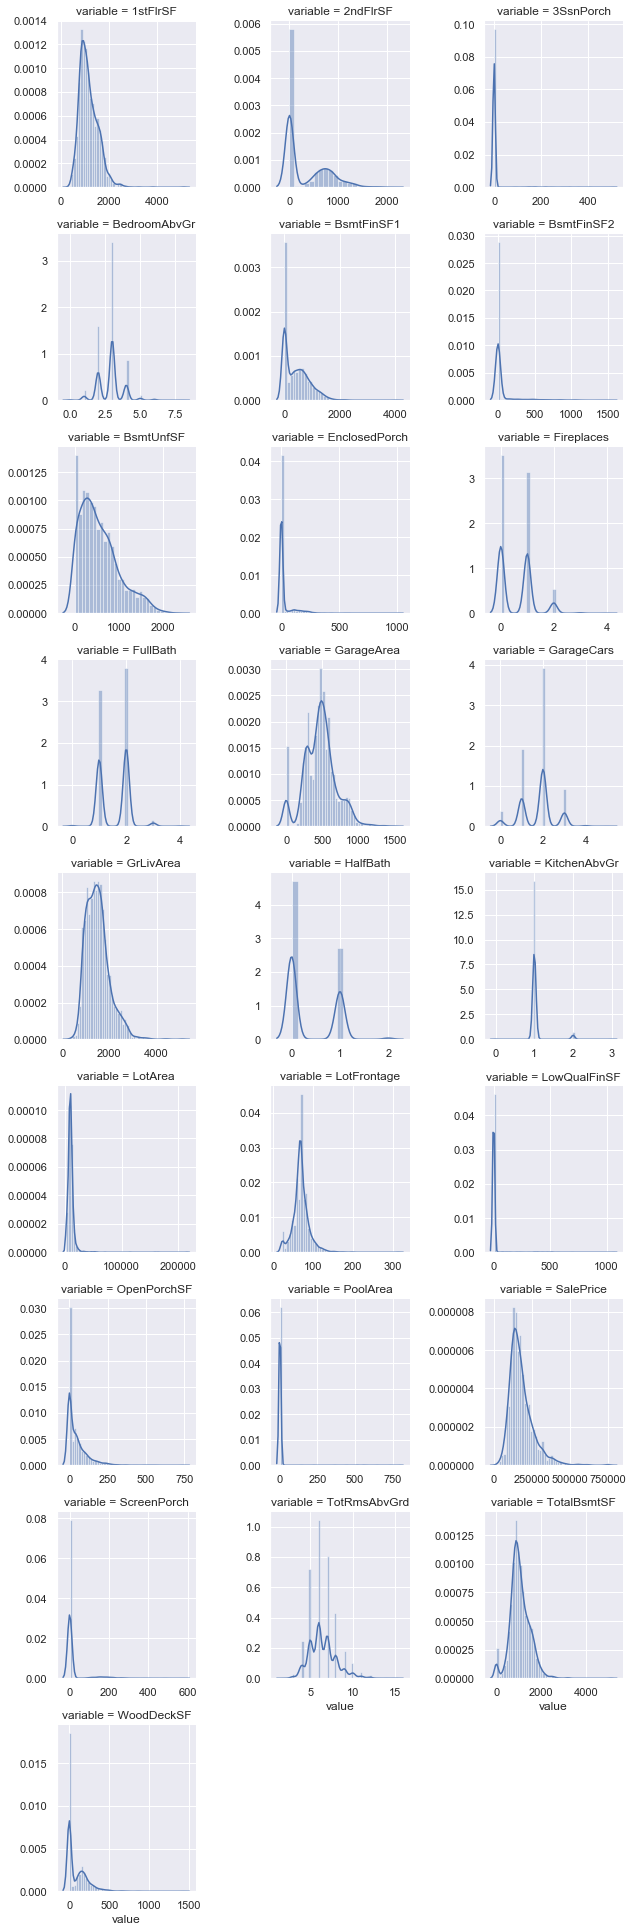

In [180]:
# 观察数值型数据的分布
f = pd.melt(df_all_dummy, value_vars = numeric_cols)
g = sns.FacetGrid(f, col = 'variable',  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

####  GrLivArea, TotalBsmtSF类似于正态分布,对其log处理。

In [181]:
Log_list = ['GrLivArea', 'TotalBsmtSF']

for i in Log_list:
    df_all_dummy[i] = np.log(df_all_dummy[i] + 1)

In [182]:
# 针对其余数值型数据也做标准化。
numeric_cols2 = numeric_cols.drop(Log_list)
numeric_col_means = df_all_dummy.loc[:, numeric_cols2].mean()
numeric_col_std = df_all_dummy.loc[:, numeric_cols2].std()
df_all_dummy.loc[:, numeric_cols2] = (df_all_dummy.loc[:, numeric_cols2] - numeric_col_means) / numeric_col_std

In [183]:
df_all_dummy = df_all_dummy.drop(['SalePrice'], axis = 1)

### 建模

In [184]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer

In [185]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNetCV, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

In [186]:
# 将数据集分为训练集和测试集
df_dummy_train = df_all_dummy.loc[df_train.index]
df_dummy_test = df_all_dummy.loc[df_test.index]

In [187]:
# 观察训练集和测试集
df_dummy_train.shape, df_dummy_test.shape

((1458, 496), (1459, 496))

In [188]:
df_dummy_train.isnull().sum()
df_dummy_test.isnull().sum().value_counts()

0    496
dtype: int64

##### Ridge Regression模型

In [189]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import Ridge

In [190]:
y_train = np.log1p(df_train.pop('SalePrice'))
x_train = df_dummy_train.values
x_test = df_dummy_test.values

In [191]:
# 用cross validation进行模型调参
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf1 = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf1, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score)) 

Text(0.5,1,'Alpha vs CV Error')

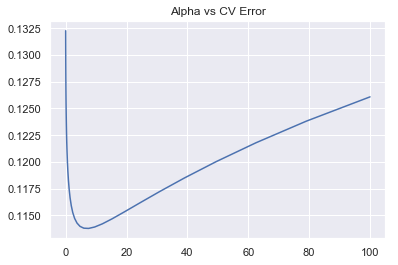

In [192]:
plt.plot(alphas, test_scores)
plt.title('Alpha vs CV Error')

In [196]:
ridge = Ridge(alpha=5)
ridge.fit(x_train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

#### RF模型

In [197]:
from sklearn.ensemble import RandomForestRegressor

In [198]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5,1,'Max Features vs CV Error')

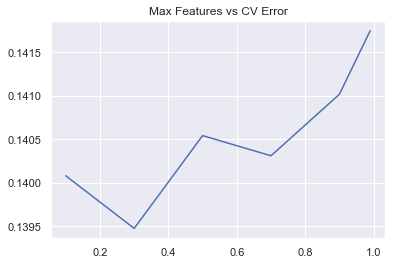

In [199]:
plt.plot(max_features, test_scores)
plt.title('Max Features vs CV Error')

In [211]:
rf = RandomForestRegressor(n_estimators=200, max_features=0.3)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### XGBoost

In [201]:
from xgboost import XGBRegressor
params = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5,1,'max_depth vs CV Error')

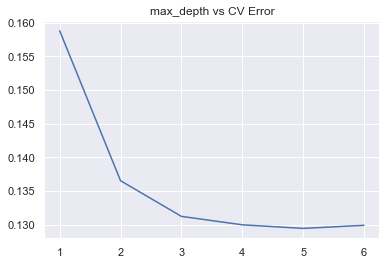

In [202]:
plt.plot(params, test_scores)
plt.title('max_depth vs CV Error')

In [210]:
xgb = XGBRegressor(max_features=5)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, max_features=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

#### Elastic Net

In [204]:
clf3 = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], 
                                    alphas=[0.001, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75])
elastic.fit(x_train, y_train)

ElasticNetCV(alphas=[0.001, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75],
       copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000,
       n_alphas=100, n_jobs=1, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [205]:
elastic.score(x_train, y_train)

0.9362093189954223

### 输出结果

In [212]:
y_ridge = np.expm1(ridge.predict(x_test))
y_rf = np.expm1(rf.predict(x_test))
y_xgb = np.expm1(xgb.predict(x_test))
y_ela = np.expm1(elastic.predict(x_test))

In [213]:
y_final_1 = y_ridge
y_final_2 = y_ela
y_final_3 = y_xgb
y_final_4 = y_ela

In [214]:
df_test.shape

(1459, 79)

In [215]:
submission_df_1 = pd.DataFrame(data= {'Id': range(1461,2920), 'SalePrice': y_final_1})
submission_df_1.to_csv('predict02-1.csv',index=False)

In [216]:
submission_df_2 = pd.DataFrame(data= {'Id': range(1461,2920), 'SalePrice': y_final_2})
submission_df_2.to_csv('predict02-2.csv',index=False)

In [217]:
submission_df_3 = pd.DataFrame(data= {'Id': range(1461,2920), 'SalePrice': y_final_3})
submission_df_3.to_csv('predict02-3.csv',index=False)

In [218]:
submission_df_4 = pd.DataFrame(data= {'Id': range(1461,2920), 'SalePrice': y_final_4})
submission_df_4.to_csv('predict02-4.csv',index=False)

In [ ]:
quantitative = [f for f in df_all.columns if df_all.dtypes[f] != 'object']
qualitative = [f for f in df_all.columns if df_all.dtypes[f] == 'object']
print("quantitative: {}, qualitative: {}" .format (len(quantitative),len(qualitative)))

In [ ]:
f = pd.melt(df_all, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [ ]:
df_all[quantitative].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [ ]:
from scipy import stats
from scipy.stats import skew
from scipy.stats import norm

In [ ]:
# 定量特征分析
train = df_all.loc[df_all.index]

def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data = a, x = 'feature', y = 'disparity')
x = plt.xticks(rotation=90)